<a href="https://colab.research.google.com/github/Ammu3103/Matplotlib-Numpy-Pandas-Seaborn-Notes/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modules to Run


In [ ]:
import pandas as pd
import numpy as np
import sqlalchemy

# Importing CSV/XLSI files from link and git

In [ ]:
!wget https://github.com/codebasics/py/tree/master/pandas

--2023-08-29 09:23:39--  https://github.com/codebasics/py/tree/master/pandas
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4341 (4.2K) [text/plain]
Saving to: ‘pandas’

pandas              100%[===================>]   4.24K  --.-KB/s    in 0s      

2023-08-29 09:23:39 (66.8 MB/s) - ‘pandas’ saved [4341/4341]



In [ ]:
!tar --gunzip --extract --verbose --file=pandas.1

tar (child): pandas.1: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
!git clone https://github.com/codebasics/py.git

Cloning into 'py'...
remote: Enumerating objects: 2910, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 2910 (delta 0), reused 4 (delta 0), pack-reused 2904
Receiving objects: 100% (2910/2910), 196.66 MiB | 26.63 MiB/s, done.
Resolving deltas: 100% (1121/1121), done.
Updating files: 100% (1388/1388), done.


# Introduction


In [ ]:
url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/10_pivot/weather.csv"

In [ ]:
import pandas as pd
# df = pd.read_csv('weather_by_cities.csv')
df = pd.read_csv(url)#df = pd.read_csv(url,encoding='unicode_escape')
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [ ]:
df['temperature'].max()

82

In [ ]:
df['temperature'].min()

65

In [ ]:
df['temperature'].std()

6.424778422465462

In [ ]:
df['temperature'].mean()

74.44444444444444

In [ ]:
df['date'][df['city']=='mumbai']

3    5/1/2017
4    5/2/2017
5    5/3/2017
Name: date, dtype: object

In [ ]:
df.fillna(0,inplace=True)# it append 0 in place of nan/empty cells
df['humidity'].mean()

57.0

# DataFrame Basics

In [ ]:
weather_data = {
    'day':['1/1/2017','1/2/2017','1/3/2017','1/4/2017','1/5/2017','1/6/2017'],
    'temperature':[32,35,28,24,32,31],
    'windspeed':[6,2,3,4,2,7],
    'event':['Rain','Snow','Sunny','Sunny','Snow','Rain']
}
df

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-12,145.74,146.09,142.51,145.42,72307330
2017-06-13,147.16,147.45,145.15,146.59,34165445
2017-06-14,147.50,147.50,143.84,145.16,31531232


In [ ]:
df = pd.DataFrame(weather_data)
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,2,Snow
2,1/3/2017,28,3,Sunny
3,1/4/2017,24,4,Sunny
4,1/5/2017,32,2,Snow
5,1/6/2017,31,7,Rain


In [ ]:
df.shape

(6, 4)

In [ ]:
rows , col = df.shape

In [ ]:
print(rows)
print(col)

6
4


In [ ]:
df.head()# print intial few rows

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,2,Snow
2,1/3/2017,28,3,Sunny
3,1/4/2017,24,4,Sunny
4,1/5/2017,32,2,Snow


In [ ]:
df.head(2)# even we can mention number rows to print from top

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,2,Snow


In [ ]:
df.tail(1)# print from bottom

,day,temperature,windspeed,event
5,1/6/2017,31,7,Rain


In [ ]:
df[2:5]#printing rows similar to slicing string

,day,temperature,windspeed,event
2,1/3/2017,28,3,Sunny
3,1/4/2017,24,4,Sunny
4,1/5/2017,32,2,Snow


In [ ]:
df.columns

Index(['day', 'temperature', 'windspeed', 'event'], dtype='object')

In [ ]:
df.day#=df['day']

0    1/1/2017
1    1/2/2017
2    1/3/2017
3    1/4/2017
4    1/5/2017
5    1/6/2017
Name: day, dtype: object

In [ ]:
type(df['event'])

pandas.core.series.Series

In [ ]:
df[['event','day']]#printing data with specific columns

,event,day
0,Rain,1/1/2017
1,Snow,1/2/2017
2,Sunny,1/3/2017
3,Sunny,1/4/2017
4,Snow,1/5/2017
5,Rain,1/6/2017


In [ ]:
df.describe()

,temperature,windspeed
count,6.000000,6.000000
mean,30.333333,4.000000
std,3.829708,2.097618
min,24.000000,2.000000
25%,28.750000,2.250000
50%,31.500000,3.500000
75%,32.000000,5.500000
max,35.000000,7.000000


In [ ]:
df[df.temperature >= 32]

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,2,Snow
4,1/5/2017,32,2,Snow


In [ ]:
df[df.temperature == df['temperature'].max()]

,day,temperature,windspeed,event
1,1/2/2017,35,2,Snow


In [ ]:
df[['day','event']][df.temperature == df['temperature'].max()]

,day,event
1,1/2/2017,Snow


In [ ]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [ ]:
# df.set_index('day')
df.set_index('day', inplace=True)
#df

In [ ]:
df.loc['1/1/2017']

temperature      32
windspeed         6
event          Rain
Name: 1/1/2017, dtype: object

In [ ]:
df.reset_index(inplace=True)
df#set to original data

,index,day,temperature,windspeed,event
0,0,1/1/2017,32,6,Rain
1,1,1/2/2017,35,2,Snow
2,2,1/3/2017,28,3,Sunny
3,3,1/4/2017,24,4,Sunny
4,4,1/5/2017,32,2,Snow
5,5,1/6/2017,31,7,Rain


In [ ]:
df.set_index('event',inplace=True)

In [ ]:
df

,index,day,temperature,windspeed
event,,,,
Rain,0,1/1/2017,32,6
Snow,1,1/2/2017,35,2
Sunny,2,1/3/2017,28,3
Sunny,3,1/4/2017,24,4
Snow,4,1/5/2017,32,2
Rain,5,1/6/2017,31,7


In [ ]:
df.loc['Snow']

,index,day,temperature,windspeed
event,,,,
Snow,1,1/2/2017,35,2
Snow,4,1/5/2017,32,2


# Different Ways of Creating DataFrame


**DATAFRAME**
1.   Importing CSV file
2.   Importing Excel sheet
3.   Python Dictionary with data
4.   From list of tuples
5.   From list of dictionaries







In [ ]:
#from csv
# df = pd.read_csv('weather_by_cities.csv')--- for imported one
df = pd.read_csv('/content/py/pandas/2_dataframe_basics/weather_data.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


In [ ]:
# df = pd.read_excel("your_excel_file_name.xlsx","sheet_no")
#df

In [ ]:
# from python dictionary
weather_data = {
    'day':['1/1/2017','1/2/2017','1/3/2017','1/4/2017','1/5/2017','1/6/2017'],
    'temperature':[32,35,28,24,32,31],
    'windspeed':[6,2,3,4,2,7],
    'event':['Rain','Snow','Sunny','Sunny','Snow','Rain']
}
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


In [ ]:
# From list of tuples
weather_data = [
    ('1/1/2017',32,6,'Rain'),
    ('1/2/2017',34,2,'Sunny'),
    ('1/3/2017',30,5,'Snow')
]
df = pd.DataFrame(weather_data, columns=['day','temperature','windspeed','event'])
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,34,2,Sunny
2,1/3/2017,30,5,Snow


In [ ]:
# from list of dictionaries
weather_data = [
    {'day':'1/1/2017','temperature':32,'windspeed':6,'event':'Rain'},
    {'day':'1/2/2017','temperature':34,'windspeed':2,'event':'Sunny'},
    {'day':'1/3/2017','temperature':30,'windspeed':5,'event':'Snow'}
]
df = pd.DataFrame(weather_data)
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,34,2,Sunny
2,1/3/2017,30,5,Snow


# Reading and Writing CSV, Excel files

Read CSV

In [ ]:
url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/4_read_write_to_excel/stock_data.csv"

In [ ]:
df = pd.read_csv(url)
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [ ]:
df = pd.read_csv(url,skiprows=1)
df

,GOOGL,27.82,87,845,larry page
0,WMT,4.61,484,65,n.a.
1,MSFT,-1,85,64,bill gates
2,RIL,not available,50,1023,mukesh ambani
3,TATA,5.6,-1,n.a.,ratan tata


In [ ]:
df = pd.read_csv(url,header=1)
df

,GOOGL,27.82,87,845,larry page
0,WMT,4.61,484,65,n.a.
1,MSFT,-1,85,64,bill gates
2,RIL,not available,50,1023,mukesh ambani
3,TATA,5.6,-1,n.a.,ratan tata


In [ ]:
df = pd.read_csv(url,header=None)
#names = ["tickers","eps","revenue","price",People] use this whenever haeding is missing
df

,0,1,2,3,4
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,n.a.
3,MSFT,-1,85,64,bill gates
4,RIL,not available,50,1023,mukesh ambani
5,TATA,5.6,-1,n.a.,ratan tata


In [ ]:
df = pd.read_csv(url,nrows=3)
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1.00,85,64,bill gates


In [ ]:
df = pd.read_csv(url,na_values=["not available","n.a."])
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845.0,larry page
1,WMT,4.61,484,65.0,NaN
2,MSFT,-1.00,85,64.0,bill gates
3,RIL,NaN,50,1023.0,mukesh ambani
4,TATA,5.60,-1,NaN,ratan tata


In [ ]:
df = pd.read_csv(url,na_values={
    'eps':["not available","n.a."],
    'revenue':["not available","n.a.",-1],
    'people':["not available","n.a."]
})
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87.0,845,larry page
1,WMT,4.61,484.0,65,NaN
2,MSFT,-1.00,85.0,64,bill gates
3,RIL,NaN,50.0,1023,mukesh ambani
4,TATA,5.60,NaN,n.a.,ratan tata


Write CSV

In [ ]:
df.to_csv('new.csv',index=False)#removes default indexs

In [ ]:
df.columns

Index(['tickers', 'eps', 'revenue', 'price', 'people'], dtype='object')

In [ ]:
df.to_csv("new.csv",columns=['tickers','eps'])#print mentioned columns

In [ ]:
df.to_csv("new.csv",header=False)#skip header

Read Excel

In [ ]:
def convert_people_cell(cell):
  if cell=="n.a.":
    return 'sam'
  return cell
def convert_eps_cell(cell):
  if cell=="not available":
    return None
  return cell
# df=pd.read_excel("stock_data.xlsx","Sheet1",converters={
  df=pd.read_excel("/content/py/pandas/4_read_write_to_excel/stock_data.xlsx","Sheet1",converters={
    'people':convert_people_cell,
    'eps':convert_eps_cell
})
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87.0,845,larry page
1,WMT,4.61,484.0,65,NaN
2,MSFT,-1.00,85.0,64,bill gates
3,RIL,NaN,50.0,1023,mukesh ambani
4,TATA,5.60,NaN,n.a.,ratan tata


In [ ]:
df.to_excel("new.xlsx",sheet_name="stocks",startrow=1,startcol=2)

In [ ]:
df_stocks = pd.DataFrame({
    'tickers': ['GOOGL', 'WMT', 'MSFT'],
    'price': [845, 65, 64 ],
    'pe': [30.37, 14.26, 30.97],
    'eps': [27.82, 4.61, 2.12]
})

df_weather =  pd.DataFrame({
    'day': ['1/1/2017','1/2/2017','1/3/2017'],
    'temperature': [32,35,28],
    'event': ['Rain', 'Sunny', 'Snow']
})


In [ ]:
with pd.ExcelWriter('stocks_weather.xlsx') as writer:
    df_stocks.to_excel(writer, sheet_name="stocks")
    df_weather.to_excel(writer, sheet_name="weather")

# Handle Missing data

In [ ]:
url = "/content/py/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"

In [ ]:
df = pd.read_csv(url)
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [ ]:
type(df.day[0])

str

In [ ]:
df = pd.read_csv(url,parse_dates=["day"])

In [ ]:
type(df.day[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df = pd.read_csv(url,parse_dates=["day"])
df.set_index('day',inplace=True)
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [ ]:
new_df=df.fillna(0)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,0
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,0
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [ ]:
new_df = df.fillna({
    'temperature':0,
    'windspeed':0,
    'event':'no event'
})
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,no event
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,no event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


Forward fill

In [ ]:
new_df = df.fillna(method = 'ffill')
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,7.0,Sunny
2017-01-09,32.0,7.0,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


Back Ward fill

In [ ]:
new_df = df.fillna(method = 'bfill')#axis = columns, limit=1
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,9.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,8.0,Rain
2017-01-08,34.0,8.0,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [ ]:
new_df = df.fillna(method = 'bfill',axis = "columns")#axis = columns, limit=1
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,9.0,9.0,Sunny
2017-01-05,28.0,Snow,Snow
2017-01-06,7.0,7.0,NaN
2017-01-07,32.0,Rain,Rain
2017-01-08,Sunny,Sunny,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [ ]:
new_df = df.fillna(method = 'bfill',limit=1)#axis = columns, limit=1
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,9.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


Interpolate-Linear


*   In place of Nane it will place intermidiate value of precedence and succesor values






In [ ]:
new_df = df.interpolate()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,30.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


Time method to predict at that time

In [ ]:
new_df = df.interpolate(method="time")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


Delete row if it has na value

In [ ]:
new_df = df.dropna()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


If a row has all na values then it discard that row

In [ ]:
new_df = df.dropna(how="all")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


number of na = (thresh=no) then it discard that row

In [ ]:
new_df = df.dropna(thresh=2)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-07,32.0,NaN,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [ ]:
dt=pd.date_range("01-01-2017","01-11-2017")
idx = pd.DatetimeIndex(dt)
df=df.reindex(idx)
df

,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


# Missing Data handiling : Replace Function

In [ ]:
url="/content/py/pandas/6_handling_missing_data_replace/weather_data.csv"

In [ ]:
df = pd.read_csv(url)
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [ ]:
new_df = df.replace(-99999,np.NaN)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


In [ ]:
new_df = df.replace([-99999,-88888],np.NaN)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


In [ ]:
new_df = df.replace({
    'temperature':-99999,
    'windspeed':-99999,
    'event':'0'
},np.NaN)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,NaN
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,NaN


In [ ]:
new_df = df.replace({
    -99999 :np.NaN,
    'No Event':'Sunny'
})
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


In [ ]:
new_df = df.replace('[A-Za-z]','',regex=True)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,
1,1/2/2017,-99999,7,
2,1/3/2017,28,-99999,
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,
5,1/6/2017,31,2,
6,1/6/2017,34,5,0


In [ ]:
new_df = df.replace({
    'temperature':'[A-za-z]',
    'windspeed':'[A-za-z]',
},'',regex=True)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [ ]:
df = pd.DataFrame({
    'score':['exceptional','average','good','poor','average','exceptional'],
    'student':['rob','maya','parthiv','tom','julian','erica']
})
df

,score,student
0,exceptional,rob
1,average,maya
2,good,parthiv
3,poor,tom
4,average,julian
5,exceptional,erica


In [ ]:
df.replace(['poor','average','good','exceptional'],[1,2,3,4])

,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


# Group By

In [ ]:
df = pd.read_csv("/content/py/pandas/7_group_by/weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [ ]:
g = df.groupby('city')
g

In [ ]:
for city, city_df in g:
  print(city)
  print(city_df)

mumbai
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york
        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


SELECT * from city_data GROUP BY city------similar to this


In [ ]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [ ]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [ ]:
g.mean()

<ipython-input-120-c79523bc0c66>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g.mean()


,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [ ]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

city
mumbai      Axes(0.125,0.11;0.775x0.77)
new york    Axes(0.125,0.11;0.775x0.77)
paris       Axes(0.125,0.11;0.775x0.77)
dtype: object

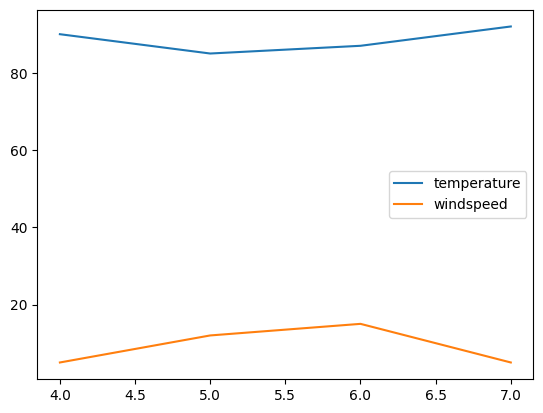

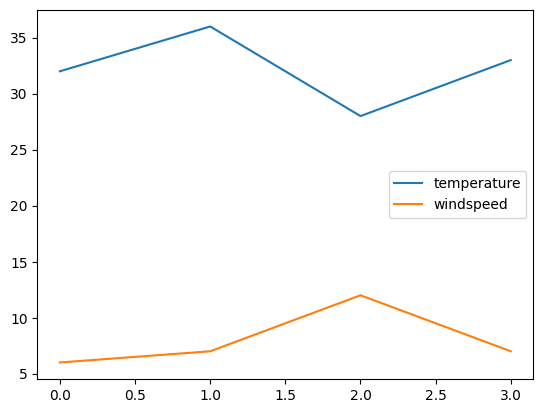

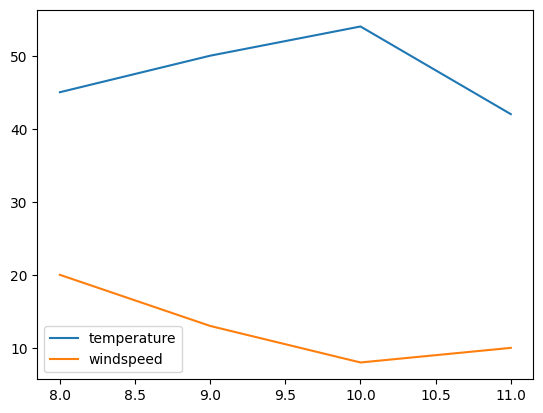

In [ ]:
%matplotlib inline
g.plot()

# Pandas Concatnate DataFrame

In [ ]:
india_weather = pd.DataFrame({
    'city':['mumbai','delhi','banglore'],
    'temperature':[32,40,52],
    'humidity':[80,90,78]
})
india_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,40,90
2,banglore,52,78


In [ ]:
USA_weather = pd.DataFrame({
    'city':['new york','chicago','orlando'],
    'temperature':[21,45,32],
    'humidity':[70,80,68]
})
USA_weather

,city,temperature,humidity
0,new york,21,70
1,chicago,45,80
2,orlando,32,68


In [ ]:
df = pd.concat([india_weather,USA_weather])
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,40,90
2,banglore,52,78
0,new york,21,70
1,chicago,45,80
2,orlando,32,68


In [ ]:
df = pd.concat([india_weather,USA_weather],ignore_index=True)
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,40,90
2,banglore,52,78
3,new york,21,70
4,chicago,45,80
5,orlando,32,68


In [ ]:
df = pd.concat([india_weather,USA_weather],keys=["india","USA"])
df

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           40        90
      2  banglore           52        78
USA   0  new york           21        70
      1   chicago           45        80
      2   orlando           32        68

In [ ]:
df.loc['USA']

,city,temperature,humidity
0,new york,21,70
1,chicago,45,80
2,orlando,32,68


In [ ]:
tem_df = pd.DataFrame({
    'city':['delhi','mumbai','banglore'],
    'temperature':[32,45,30],
},index=[0,1,2])
tem_df

,city,temperature
0,delhi,32
1,mumbai,45
2,banglore,30


In [ ]:
wind_df = pd.DataFrame({
    'city':['mumbai','delhi','banglore'],
    'windspeed':[7,20,15],
},index=[1,0,2])
wind_df

,city,windspeed
1,mumbai,7
0,delhi,20
2,banglore,15


In [ ]:
df = pd.concat([tem_df,wind_df],axis=1)
df

,city,temperature,city,windspeed
0,delhi,32,delhi,20
1,mumbai,45,mumbai,7
2,banglore,30,banglore,15


In [ ]:
tem_df

,city,temperature
0,delhi,32
1,mumbai,45
2,banglore,30


In [ ]:
s = pd.Series(["Humid","Dry","Rain"],name='event')
s

0    Humid
1      Dry
2     Rain
Name: event, dtype: object

In [ ]:
df=pd.concat([tem_df,s],axis=1)
df

,city,temperature,event
0,delhi,32,Humid
1,mumbai,45,Dry
2,banglore,30,Rain


# Merge

In [ ]:
df1 = pd.DataFrame({
    "city":['new year',"chicago","oriando"],
    "temperature":[21,14,35]
})
df1

,city,temperature
0,new year,21
1,chicago,14
2,oriando,35


In [ ]:
df2 = pd.DataFrame({
    "city":['new year',"chicago","oriando"],
    "temperature":[65,68,75]
})
df2

,city,temperature
0,new year,65
1,chicago,68
2,oriando,75


In [ ]:
df3=pd.merge(df1,df2,on="city")
df3

,city,temperature_x,temperature_y
0,new year,21,65
1,chicago,14,68
2,oriando,35,75


In [ ]:
df1 = pd.DataFrame({
    "city":['new year',"chicago","oriando","Sanfrance"],
    "temperature":[21,14,35,68]
})
df1

,city,temperature
0,new year,21
1,chicago,14
2,oriando,35
3,Sanfrance,68


In [ ]:
df2 = pd.DataFrame({
    "city":['new year',"chicago","Tokyo"],
    "temperature":[65,68,75]
})
df2

,city,temperature
0,new year,65
1,chicago,68
2,Tokyo,75


In [ ]:
df3=pd.merge(df1,df2,on="city")
df3

,city,temperature_x,temperature_y
0,new year,21,65
1,chicago,14,68


In [ ]:
df3=pd.merge(df1,df2,on="city",how="outer")
df3

,city,temperature_x,temperature_y
0,new year,21.0,65.0
1,chicago,14.0,68.0
2,oriando,35.0,NaN
3,Sanfrance,68.0,NaN
4,Tokyo,NaN,75.0


In [ ]:
df3=pd.merge(df1,df2,on="city",how="outer",indicator=True)
df3

,city,temperature_x,temperature_y,_merge
0,new year,21.0,65.0,both
1,chicago,14.0,68.0,both
2,oriando,35.0,NaN,left_only
3,Sanfrance,68.0,NaN,left_only
4,Tokyo,NaN,75.0,right_only


In [ ]:
df3=pd.merge(df1,df2,on="city",how="left")
df3

,city,temperature_x,temperature_y
0,new year,21,65.0
1,chicago,14,68.0
2,oriando,35,NaN
3,Sanfrance,68,NaN


In [ ]:
df3=pd.merge(df1,df2,on="city",how="right")
df3

,city,temperature_x,temperature_y
0,new year,21.0,65
1,chicago,14.0,68
2,Tokyo,NaN,75


In [ ]:
df1 = pd.DataFrame({
    "city":['new year',"chicago","oriando","Mascow"],
    "temperature":[21,14,35,68],
    "humidity":[65,68,71,75]
})
df1

,city,temperature,humidity
0,new year,21,65
1,chicago,14,68
2,oriando,35,71
3,Mascow,68,75


In [ ]:
df2 = pd.DataFrame({
    "city":['new year',"chicago","Tokyo"],
    "temperature":[65,68,75],
    "humdity":[65,68,71]
})
df2

,city,temperature,humdity
0,new year,65,65
1,chicago,68,68
2,Tokyo,75,71


In [ ]:
df3=pd.merge(df1,df2,on="city")
df3

,city,temperature_x,humidity,temperature_y,humdity
0,new year,21,65,65,65
1,chicago,14,68,68,68


In [ ]:
df3=pd.merge(df1,df2,on="city",suffixes=('_left','_right'))
df3

,city,temperature_left,humidity,temperature_right,humdity
0,new year,21,65,65,65
1,chicago,14,68,68,68


# Pivot
*  Transform or Reshape data





In [ ]:
url= "/content/py/pandas/10_pivot/weather.csv"

In [ ]:
df= pd.read_csv(url)
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [ ]:
df.pivot(index="date",columns="city")

temperature                 humidity                
city         beijing mumbai new york  beijing mumbai new york
date                                                         
5/1/2017          80     75       65       26     80       56
5/2/2017          77     78       66       30     83       58
5/3/2017          79     82       68       35     85       60

In [ ]:
df.pivot(index="date",columns="city",values="humidity")

city,beijing,mumbai,new york
date,,,
5/1/2017,26,80,56
5/2/2017,30,83,58
5/3/2017,35,85,60


In [ ]:
url = "/content/py/pandas/10_pivot/weather2.csv"

In [ ]:
df= pd.read_csv(url)
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


In [ ]:
df.pivot_table(index="city",columns="date")

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai       81.5     55.5        76.5     81.0
new york     55.0     61.0        63.0     71.0

In [ ]:
df.pivot_table(index="city",columns="date",aggfunc="sum")

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai        163      111         153      162
new york      110      122         126      142

In [ ]:
df.pivot_table(index="city",columns="date",margins=True)

humidity                 temperature                 
date     5/1/2017 5/2/2017    All    5/1/2017 5/2/2017     All
city                                                          
mumbai      81.50    55.50  68.50       76.50     81.0  78.750
new york    55.00    61.00  58.00       63.00     71.0  67.000
All         68.25    58.25  63.25       69.75     76.0  72.875

In [ ]:
url = "/content/py/pandas/10_pivot/weather3.csv"

In [ ]:
df= pd.read_csv(url)
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,61,54
2,5/3/2017,new york,70,60
3,12/1/2017,new york,30,50
4,12/2/2017,new york,28,52
5,12/3/2017,new york,25,51


In [ ]:
df['date']=pd.to_datetime(df['date'])
df

,date,city,temperature,humidity
0,2017-05-01,new york,65,56
1,2017-05-02,new york,61,54
2,2017-05-03,new york,70,60
3,2017-12-01,new york,30,50
4,2017-12-02,new york,28,52
5,2017-12-03,new york,25,51


In [ ]:
df.pivot_table(index=pd.Grouper(freq='M',key='date'),columns='city')

,humidity,temperature
city,new york,new york
date,,
2017-05-31,56.666667,65.333333
2017-12-31,51.000000,27.666667


# Pandas Melt Func
*   Transform/Reshape data




In [ ]:
url="/content/py/pandas/11_melt/weather.csv"

In [ ]:
df = pd.read_csv(url)
df

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45
3,Thursday,22,82,38
4,Friday,30,83,30
5,Saturday,20,81,45
6,Sunday,25,77,47


In [ ]:
df1=pd.melt(df,id_vars=["day"])
df1

,day,variable,value
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


In [ ]:
df1=pd.melt(df,id_vars=["day"],var_name="city",value_name="temperature")
df1

,day,city,temperature
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


In [ ]:
df1=pd.melt(df,id_vars=["day"])
df1[df1["variable"]=="chicago"]

,day,variable,value
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25


# Stack Unstack


In [ ]:
url="/content/py/pandas/12_stack/stocks.xlsx"

In [ ]:
df = pd.read_excel(url,header=[0,1])
df

Unnamed: 0_level_0    Price                  Price to earnings ratio (P/E)  \
             Company Facebook Google Microsoft                      Facebook   
0         2017-06-05      155    955        66                         37.10   
1         2017-06-06      150    987        69                         36.98   
2         2017-06-07      153    963        62                         36.78   
3         2017-06-08      155   1000        61                         36.11   
4         2017-06-09      156   1012        66                         37.07   

                    
  Google Microsoft  
0   32.0     30.31  
1   31.3     30.56  
2   31.7     30.46  
3   31.2     30.11  
4   30.0     31.00

In [ ]:
df.stack()

Price  Price to earnings ratio (P/E) Unnamed: 0_level_0
0 Company       NaN                            NaN         2017-06-05
  Facebook    155.0                          37.10                NaT
  Google      955.0                          32.00                NaT
  Microsoft    66.0                          30.31                NaT
1 Company       NaN                            NaN         2017-06-06
  Facebook    150.0                          36.98                NaT
  Google      987.0                          31.30                NaT
  Microsoft    69.0                          30.56                NaT
2 Company       NaN                            NaN         2017-06-07
  Facebook    153.0                          36.78                NaT
  Google      963.0                          31.70                NaT
  Microsoft    62.0                          30.46                NaT
3 Company       NaN                            NaN         2017-06-08
  Facebook    155.0                          36.11                NaT
  Google     1000.0                          31.20                NaT
  Microsoft    61.0                          30.11                NaT
4 Company       NaN                            NaN         2017-06-09
  Facebook    156.0                          37.07                NaT
  Google     1012.0                          30.00                NaT
  Microsoft    66.0                          31.00                NaT

In [ ]:
df1=df.stack(level=0)
df1

Company  Facebook  Google  Microsoft
0 Price                                NaT    155.00   955.0      66.00
  Price to earnings ratio (P/E)        NaT     37.10    32.0      30.31
  Unnamed: 0_level_0            2017-06-05       NaN     NaN        NaN
1 Price                                NaT    150.00   987.0      69.00
  Price to earnings ratio (P/E)        NaT     36.98    31.3      30.56
  Unnamed: 0_level_0            2017-06-06       NaN     NaN        NaN
2 Price                                NaT    153.00   963.0      62.00
  Price to earnings ratio (P/E)        NaT     36.78    31.7      30.46
  Unnamed: 0_level_0            2017-06-07       NaN     NaN        NaN
3 Price                                NaT    155.00  1000.0      61.00
  Price to earnings ratio (P/E)        NaT     36.11    31.2      30.11
  Unnamed: 0_level_0            2017-06-08       NaN     NaN        NaN
4 Price                                NaT    156.00  1012.0      66.00
  Price to earnings ratio (P/E)        NaT     37.07    30.0      31.00
  Unnamed: 0_level_0            2017-06-09       NaN     NaN        NaN

In [ ]:
df1.unstack()

Company                                                  Facebook  \
    Price Price to earnings ratio (P/E) Unnamed: 0_level_0    Price   
0     NaT                           NaT         2017-06-05    155.0   
1     NaT                           NaT         2017-06-06    150.0   
2     NaT                           NaT         2017-06-07    153.0   
3     NaT                           NaT         2017-06-08    155.0   
4     NaT                           NaT         2017-06-09    156.0   

                                                    Google  \
  Price to earnings ratio (P/E) Unnamed: 0_level_0   Price   
0                         37.10                NaN   955.0   
1                         36.98                NaN   987.0   
2                         36.78                NaN   963.0   
3                         36.11                NaN  1000.0   
4                         37.07                NaN  1012.0   

                                                   Microsoft  \
  Price to earnings ratio (P/E) Unnamed: 0_level_0     Price   
0                          32.0                NaN      66.0   
1                          31.3                NaN      69.0   
2                          31.7                NaN      62.0   
3                          31.2                NaN      61.0   
4                          30.0                NaN      66.0   

                                                    
  Price to earnings ratio (P/E) Unnamed: 0_level_0  
0                         30.31                NaN  
1                         30.56                NaN  
2                         30.46                NaN  
3                         30.11                NaN  
4                         31.00                NaN

In [ ]:
df2 = pd.read_excel("/content/py/pandas/12_stack/stocks_3_levels.xlsx",
                    header=[0,1,2])
df2

Unnamed: 0_level_0 Price Ratios                   \
  Unnamed: 0_level_1        Price                    
             Company     Facebook Google Microsoft   
0            Q1 2016          155    955        66   
1            Q2 2016          150    987        69   
2            Q3 2016          153    963        62   
3            Q4 2016          155   1000        61   
4            Q1 2017          156   1012        66   

                                                 Income Statement         \
  Price to earnings ratio (P/E)                         Net Sales          
                       Facebook Google Microsoft         Facebook Google   
0                         37.10   32.0     30.31              2.6     20   
1                         36.98   31.3     30.56              3.1     22   
2                         36.78   31.7     30.46              4.3     24   
3                         36.11   31.2     30.11              6.7     26   
4                         37.07   30.0     31.00              8.1     31   

                                         
            Net Profit                   
  Microsoft   Facebook Google Microsoft  
0     18.70       0.80   5.43      4.56  
1     21.30       0.97   5.89      5.10  
2     21.45       1.20   6.10      5.43  
3     21.88       1.67   6.50      5.89  
4     22.34       2.03   6.40      6.09

In [ ]:
df2.stack()

Income Statement           Price Ratios  \
                  Net Profit Net Sales        Price   
0 Company                NaN       NaN          NaN   
  Facebook              0.80      2.60        155.0   
  Google                5.43     20.00        955.0   
  Microsoft             4.56     18.70         66.0   
1 Company                NaN       NaN          NaN   
  Facebook              0.97      3.10        150.0   
  Google                5.89     22.00        987.0   
  Microsoft             5.10     21.30         69.0   
2 Company                NaN       NaN          NaN   
  Facebook              1.20      4.30        153.0   
  Google                6.10     24.00        963.0   
  Microsoft             5.43     21.45         62.0   
3 Company                NaN       NaN          NaN   
  Facebook              1.67      6.70        155.0   
  Google                6.50     26.00       1000.0   
  Microsoft             5.89     21.88         61.0   
4 Company                NaN       NaN          NaN   
  Facebook              2.03      8.10        156.0   
  Google                6.40     31.00       1012.0   
  Microsoft             6.09     22.34         66.0   

                                          Unnamed: 0_level_0  
            Price to earnings ratio (P/E) Unnamed: 0_level_1  
0 Company                             NaN            Q1 2016  
  Facebook                          37.10                NaN  
  Google                            32.00                NaN  
  Microsoft                         30.31                NaN  
1 Company                             NaN            Q2 2016  
  Facebook                          36.98                NaN  
  Google                            31.30                NaN  
  Microsoft                         30.56                NaN  
2 Company                             NaN            Q3 2016  
  Facebook                          36.78                NaN  
  Google                            31.70                NaN  
  Microsoft                         30.46                NaN  
3 Company                             NaN            Q4 2016  
  Facebook                          36.11                NaN  
  Google                            31.20                NaN  
  Microsoft                         30.11                NaN  
4 Company                             NaN            Q1 2017  
  Facebook                          37.07                NaN  
  Google                            30.00                NaN  
  Microsoft                         31.00                NaN

In [ ]:
df2.stack(level=1)

Income Statement                   \
                                        Facebook Google Microsoft   
0 Net Profit                                0.80   5.43      4.56   
  Net Sales                                 2.60  20.00     18.70   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
1 Net Profit                                0.97   5.89      5.10   
  Net Sales                                 3.10  22.00     21.30   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
2 Net Profit                                1.20   6.10      5.43   
  Net Sales                                 4.30  24.00     21.45   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
3 Net Profit                                1.67   6.50      5.89   
  Net Sales                                 6.70  26.00     21.88   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
4 Net Profit                                2.03   6.40      6.09   
  Net Sales                                 8.10  31.00     22.34   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   

                                Price Ratios                    \
                                    Facebook  Google Microsoft   
0 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               155.00   955.0     66.00   
  Price to earnings ratio (P/E)        37.10    32.0     30.31   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
1 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               150.00   987.0     69.00   
  Price to earnings ratio (P/E)        36.98    31.3     30.56   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
2 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               153.00   963.0     62.00   
  Price to earnings ratio (P/E)        36.78    31.7     30.46   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
3 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               155.00  1000.0     61.00   
  Price to earnings ratio (P/E)        36.11    31.2     30.11   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
4 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               156.00  1012.0     66.00   
  Price to earnings ratio (P/E)        37.07    30.0     31.00   
  Unnamed: 0_level_1                     NaN     NaN       NaN   

                                Unnamed: 0_level_0  
                                           Company  
0 Net Profit                                   NaN  
  Net Sales                                    NaN  
  Price                                        NaN  
  Price to earnings ratio (P/E)                NaN  
  Unnamed: 0_level_1                       Q1 2016  
1 Net Profit  

# Crosstab


*   Frequency distribution of variables
*   Matrix form



In [ ]:
url="/content/py/pandas/13_crosstab/survey.xls"

In [ ]:
df = pd.read_excel(url)
df

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [ ]:
pd.crosstab(df.Nationality,df.Handedness)

Handedness,Left,Right
Nationality,,
Bangadesh,2,0
China,2,1
India,2,1
USA,1,3


In [ ]:
pd.crosstab(df.Sex,df.Handedness,margins=True)

Handedness,Left,Right,All
Sex,,,
Female,2,3,5
Male,5,2,7
All,7,5,12


In [ ]:
pd.crosstab([df.Nationality,df.Sex],[df.Handedness])

Handedness          Left  Right
Nationality Sex                
Bangadesh   Female     1      0
            Male       1      0
China       Female     1      1
            Male       1      0
India       Male       2      1
USA         Female     0      2
            Male       1      1

In [ ]:
pd.crosstab([df.Sex],[df.Handedness],normalize='index')#gives percentage

Handedness,Left,Right
Sex,,
Female,0.400000,0.600000
Male,0.714286,0.285714


In [ ]:
pd.crosstab([df.Sex],[df.Handedness], values=df.Age,aggfunc =np.average)

Handedness,Left,Right
Sex,,
Female,44.5,31.0
Male,31.2,28.0


# Handle Large Datasets

https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqa0FiYlRHRXBuV3pQVEZZOURDbzhRTnh0b0dDd3xBQ3Jtc0tsQkt3ajltZlpaS2FXT0JPcWpzcHJZVzFGdnA4YlRwWWw0YWx6MWFGM1hQZnNaams1TXFfVTdaTzJLdG5mYXFpLUVhX0JVQnF2bDcwd2s3dkl1OUhoLVA5SjNJcGtBdjFhXzliRVU1dmFVSzJnVXVsRQ&q=https%3A%2F%2Fpythonspeed.com%2Farticles%2Fpandas-load-less-data%2F&v=HNE0qHJ9A9o

# Time Series Analysis


*   DatetimeIndex and Resample




In [ ]:
url = "/content/py/pandas/14_ts_datetimeindex/aapl.csv"

In [ ]:
df = pd.read_csv(url,parse_dates=['Date'],index_col='Date')
df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


In [ ]:
df.index

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [ ]:
df['2017-01']

<ipython-input-185-583ce925afa7>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2017-01']


,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


In [ ]:
df['2017-01'].Close.mean()

<ipython-input-186-d98e166639c9>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2017-01'].Close.mean()


119.57000000000001

In [ ]:
df["2017-01-07":"2017-01-01"]

<ipython-input-187-1b3255bb262f>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df["2017-01-07":"2017-01-01"]


,Open,High,Low,Close,Volume
Date,,,,,


<Axes: xlabel='Date'>

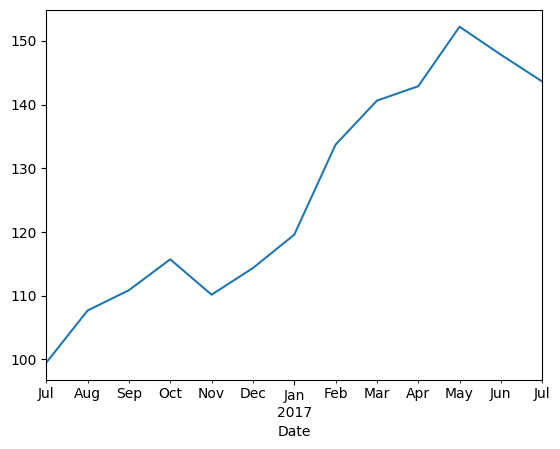

In [ ]:
%matplotlib inline
df.Close.resample('M').mean().plot()

<Axes: xlabel='Date'>

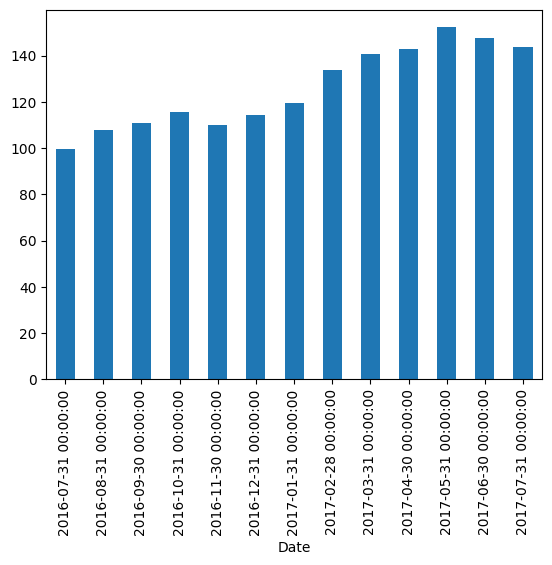

In [ ]:
%matplotlib inline
df.Close.resample('M').mean().plot(kind="bar")

# Time Series Analysis

*   Daterange



In [ ]:
url = "/content/py/pandas/15_ts_date_range/aapl_no_dates.csv"

In [ ]:
df = pd.read_csv(url)
df.head()

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647


In [ ]:
rng = pd.date_range(start="6/1/2017",end="6/30/2017",freq='B')#B-bussiness
rng

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
df.set_index(rng,inplace=True)
df

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-12,145.74,146.09,142.51,145.42,72307330
2017-06-13,147.16,147.45,145.15,146.59,34165445
2017-06-14,147.50,147.50,143.84,145.16,31531232


<Axes: >

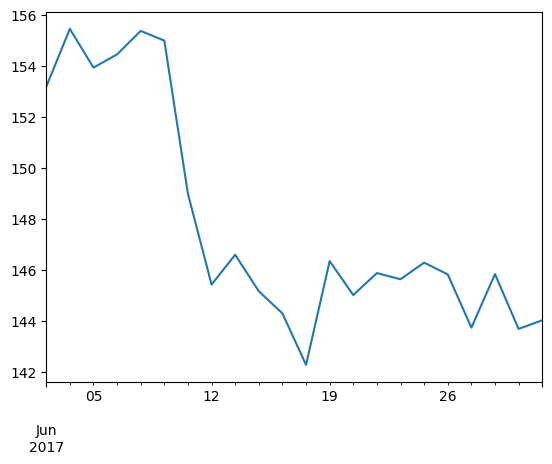

In [ ]:
%matplotlib inline
df.Close.plot()

In [ ]:
df["2017-06-01":"2017-06-13"].Close.mean()

152.04

In [ ]:
df.asfreq('D',method='pad')

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-03,153.58,155.45,152.89,155.45,27770715
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-10,155.19,155.19,146.02,148.98,64882657


In [ ]:
df.asfreq('H',method='pad')

,Open,High,Low,Close,Volume
2017-06-01 00:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 01:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 02:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 03:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 04:00:00,153.17,153.33,152.22,153.18,16404088
...,...,...,...,...,...
2017-06-29 20:00:00,144.71,145.13,142.28,143.68,31499368
2017-06-29 21:00:00,144.71,145.13,142.28,143.68,31499368
2017-06-29 22:00:00,144.71,145.13,142.28,143.68,31499368
2017-06-29 23:00:00,144.71,145.13,142.28,143.68,31499368


In [ ]:
rng = pd.date_range(start="1/1/2017",periods=72,freq='H')
rng

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               '2017-01-01 10:00:00', '2017-01-01 11:00:00',
               '2017-01-01 12:00:00', '2017-01-01 13:00:00',
               '2017-01-01 14:00:00', '2017-01-01 15:00:00',
               '2017-01-01 16:00:00', '2017-01-01 17:00:00',
               '2017-01-01 18:00:00', '2017-01-01 19:00:00',
               '2017-01-01 20:00:00', '2017-01-01 21:00:00',
               '2017-01-01 22:00:00', '2017-01-01 23:00:00',
               '2017-01-02 00:00:00', '2017-01-02 01:00:00',
               '2017-01-02 02:00:00', '2017-01-02 03:00:00',
               '2017-01-02 04:00:00', '2017-01-02 05:00:00',
               '2017-01-02 06:00:00', '2017-01-02 07:00:00',
               '2017-01-

In [ ]:
import numpy as np
ts = pd.Series(np.random.randint(1,10,len(rng)),index=rng)
ts.head(10)

2017-01-01 00:00:00    4
2017-01-01 01:00:00    4
2017-01-01 02:00:00    4
2017-01-01 03:00:00    6
2017-01-01 04:00:00    1
2017-01-01 05:00:00    1
2017-01-01 06:00:00    7
2017-01-01 07:00:00    5
2017-01-01 08:00:00    7
2017-01-01 09:00:00    3
Freq: H, dtype: int64

# Pandas Time Series Analysis


*   Holidays




In [ ]:
url = "/content/py/pandas/16_ts_holidays/aapl_no_dates.csv"

In [ ]:
df = pd.read_csv(url)
df.head()

,Open,High,Low,Close,Volume
0,144.88,145.30,143.10,143.50,14277848
1,143.69,144.79,142.72,144.09,21569557
2,143.02,143.50,142.41,142.73,24128782
3,142.90,144.75,142.90,144.18,19201712
4,144.11,145.95,143.37,145.06,21090636


In [ ]:
pd.date_range(start="7/1/2017",end="7/21/2017",freq='B')

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

usb = CustomBusinessDay(calendar=USFederalHolidayCalendar())
usb

<CustomBusinessDay>

In [ ]:
rng= pd.date_range(start="7/1/2017",end="7/21/2017",freq=usb)

In [ ]:
df.set_index(rng,inplace=True)
df

,Open,High,Low,Close,Volume
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-10,144.11,145.95,143.37,145.06,21090636
2017-07-11,144.73,145.85,144.38,145.53,19781836
2017-07-12,145.87,146.18,144.82,145.74,24884478
2017-07-13,145.50,148.49,145.44,147.77,25199373
2017-07-14,147.97,149.33,147.33,149.04,20132061
2017-07-17,148.82,150.90,148.57,149.56,23793456


In [ ]:
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday
class myCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('My Birth Day', month=4, day=15),#, observance=nearest_workday),
    ]
myc = CustomBusinessDay(calendar=myCalendar())
myc

<CustomBusinessDay>

In [ ]:
pd.date_range(start="4/1/2017",end="4/30/2017",freq=myc)

DatetimeIndex(['2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-14', '2017-04-17', '2017-04-18',
               '2017-04-19', '2017-04-20', '2017-04-21', '2017-04-24',
               '2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28'],
              dtype='datetime64[ns]', freq='C')

# to_datetime in Time Series

In [ ]:
dates = ['2017-01-05 2:30','Jan 5,2017 14:30:00','01/05/2017','2017.01.05','2017/01/05','20170105']#error-string
pd.to_datetime(dates,errors='coerce')

DatetimeIndex(['2017-01-05 02:30:00', '2017-01-05 14:30:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime('5#1#2017',format='%d#%m#%Y')

Timestamp('2017-01-05 00:00:00')

In [ ]:
t = 1693244870
dt = pd.to_datetime([t],unit='s')
dt

DatetimeIndex(['2023-08-28 17:47:50'], dtype='datetime64[ns]', freq=None)

In [ ]:
dt.view('int64')#extra zeros for nano seconds

array([1693244870000000000])

# Period and PeriodIndex in Time Series

In [ ]:
y = pd.Period('2016')
y

Period('2016', 'A-DEC')

In [ ]:
dir(y)

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_offset',
 '_add_timedeltalike_scalar',
 '_dtype',
 '_from_ordinal',
 '_maybe_convert_freq',
 '_require_matching_freq',
 'asfreq',
 'day',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'freq',
 'freqstr',
 'hour',
 'is_leap_year',
 'minute',
 'month',
 'now',
 'ordinal',
 'quarter',
 'qyear',
 'second',
 'start_time',
 'strftime',
 'to_timestamp',
 'week',
 'weekday',
 'weekofyear',
 'year']

In [ ]:
y.start_time

Timestamp('2016-01-01 00:00:00')

In [ ]:
y.end_time

Timestamp('2016-12-31 23:59:59.999999999')

In [ ]:
m = pd.Period('2011-1',freq='M')
m

Period('2011-01', 'M')

In [ ]:
m.start_time

Timestamp('2011-01-01 00:00:00')

In [ ]:
m.end_time

Timestamp('2011-01-31 23:59:59.999999999')

In [ ]:
m+1

Period('2011-02', 'M')

In [ ]:
h = pd.Period('2017-02-28 23:00:00',freq='H')
h

Period('2017-02-28 23:00', 'H')

In [ ]:
h.start_time

Timestamp('2017-02-28 23:00:00')

In [ ]:
h.end_time

Timestamp('2017-02-28 23:59:59.999999999')

In [ ]:
h+pd.offsets.Hour(5)

Period('2017-03-01 04:00', 'H')

In [ ]:
q = pd.Period('2017Q1',freq='Q-JAN')
q

Period('2017Q1', 'Q-JAN')

In [ ]:
q.start_time

Timestamp('2016-02-01 00:00:00')

In [ ]:
q.asfreq('H')

Period('2016-04-30 23:00', 'H')

In [ ]:
q2 = pd.Period('2018Q2',freq='Q-JAN')

In [ ]:
q2-q

<5 * QuarterEnds: startingMonth=1>

In [ ]:
indx = pd.period_range('2011','2018',freq='Q')#periods=10
indx

PeriodIndex(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
             '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
             '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2',
             '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4',
             '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'],
            dtype='period[Q-DEC]')

In [ ]:
import numpy as np
ps = pd.Series(np.random.randn(len(indx)),indx)
ps

2011Q1   -0.049237
2011Q2    0.178235
2011Q3   -0.237761
2011Q4    0.096663
2012Q1   -0.512278
2012Q2    0.131716
2012Q3   -0.468428
2012Q4   -0.038782
2013Q1    0.376456
2013Q2    0.048226
2013Q3    1.557479
2013Q4   -0.944787
2014Q1    0.056417
2014Q2    1.040892
2014Q3   -0.369240
2014Q4   -1.554788
2015Q1   -0.454724
2015Q2    0.129918
2015Q3   -0.152134
2015Q4   -0.245433
2016Q1    0.217178
2016Q2    0.777728
2016Q3    0.956176
2016Q4    1.375941
2017Q1    1.215893
2017Q2    0.577926
2017Q3    0.031769
2017Q4   -1.079771
2018Q1    1.028514
Freq: Q-DEC, dtype: float64

In [ ]:
ps.index

PeriodIndex(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
             '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
             '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2',
             '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4',
             '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'],
            dtype='period[Q-DEC]')

In [ ]:
ps['2013']

2013Q1    0.376456
2013Q2    0.048226
2013Q3    1.557479
2013Q4   -0.944787
Freq: Q-DEC, dtype: float64

In [ ]:
ps['2011':'2017']

2011Q1   -0.049237
2011Q2    0.178235
2011Q3   -0.237761
2011Q4    0.096663
2012Q1   -0.512278
2012Q2    0.131716
2012Q3   -0.468428
2012Q4   -0.038782
2013Q1    0.376456
2013Q2    0.048226
2013Q3    1.557479
2013Q4   -0.944787
2014Q1    0.056417
2014Q2    1.040892
2014Q3   -0.369240
2014Q4   -1.554788
2015Q1   -0.454724
2015Q2    0.129918
2015Q3   -0.152134
2015Q4   -0.245433
2016Q1    0.217178
2016Q2    0.777728
2016Q3    0.956176
2016Q4    1.375941
2017Q1    1.215893
2017Q2    0.577926
2017Q3    0.031769
2017Q4   -1.079771
Freq: Q-DEC, dtype: float64

In [ ]:
pst = ps.to_timestamp()
pst

2011-01-01   -0.049237
2011-04-01    0.178235
2011-07-01   -0.237761
2011-10-01    0.096663
2012-01-01   -0.512278
2012-04-01    0.131716
2012-07-01   -0.468428
2012-10-01   -0.038782
2013-01-01    0.376456
2013-04-01    0.048226
2013-07-01    1.557479
2013-10-01   -0.944787
2014-01-01    0.056417
2014-04-01    1.040892
2014-07-01   -0.369240
2014-10-01   -1.554788
2015-01-01   -0.454724
2015-04-01    0.129918
2015-07-01   -0.152134
2015-10-01   -0.245433
2016-01-01    0.217178
2016-04-01    0.777728
2016-07-01    0.956176
2016-10-01    1.375941
2017-01-01    1.215893
2017-04-01    0.577926
2017-07-01    0.031769
2017-10-01   -1.079771
2018-01-01    1.028514
Freq: QS-OCT, dtype: float64

In [ ]:
pst.index

DatetimeIndex(['2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01',
               '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01',
               '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01',
               '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01',
               '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01',
               '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
               '2018-01-01'],
              dtype='datetime64[ns]', freq='QS-OCT')

In [ ]:
pst.to_period()

2011Q1   -0.049237
2011Q2    0.178235
2011Q3   -0.237761
2011Q4    0.096663
2012Q1   -0.512278
2012Q2    0.131716
2012Q3   -0.468428
2012Q4   -0.038782
2013Q1    0.376456
2013Q2    0.048226
2013Q3    1.557479
2013Q4   -0.944787
2014Q1    0.056417
2014Q2    1.040892
2014Q3   -0.369240
2014Q4   -1.554788
2015Q1   -0.454724
2015Q2    0.129918
2015Q3   -0.152134
2015Q4   -0.245433
2016Q1    0.217178
2016Q2    0.777728
2016Q3    0.956176
2016Q4    1.375941
2017Q1    1.215893
2017Q2    0.577926
2017Q3    0.031769
2017Q4   -1.079771
2018Q1    1.028514
Freq: Q-DEC, dtype: float64

In [ ]:
url="/content/py/pandas/18_ts_period/wmt.csv"

In [ ]:
df=pd.read_csv(url)
df

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [ ]:
df.set_index('Line Item')

,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
Line Item,,,,,
Revenue,115904,120854,118179,130936,117542
Expenses,86544,89485,87484,97743,87688
Profit,29360,31369,30695,33193,29854


In [ ]:
df =df.T
df

,0,1,2
Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [ ]:
# df.index

In [ ]:
df.index = pd.PeriodIndex(df.index, freq='Q-JAN')
df.index

PeriodIndex(['2018Q3', '2018Q3', '2018Q3', '2018Q3', '2018Q3', '2018Q3'], dtype='period[Q-JAN]', name='Date Time')

In [ ]:
df['start date']=df.index.map(lambda x:x.start_time)#x.end_time
df

,Price,start date
Date Time,,
2018Q3,72.38,2017-08-01
2018Q3,71.00,2017-08-01
2018Q3,71.67,2017-08-01
2018Q3,72.80,2017-08-01
2018Q3,73.00,2017-08-01
2018Q3,72.50,2017-08-01


#TimeZone Handling in Pandas Time Series

In [ ]:
url="/content/py/pandas/19_ts_timezone/msft.csv"

In [ ]:
df = pd.read_csv(url,header=1,index_col='Date Time',parse_dates=True)
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [ ]:
df.index

DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

**Two Types of Date Time Objects in Python**


1.   Naive(NO tieZone awareness)
2.   Time Zone aware datetime



In [ ]:
df=df.tz_localize(tz='US/Eastern')
df.index

DatetimeIndex(['2017-08-17 09:00:00-04:00', '2017-08-17 09:15:00-04:00',
               '2017-08-17 09:30:00-04:00', '2017-08-17 10:00:00-04:00',
               '2017-08-17 10:30:00-04:00', '2017-08-17 11:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date Time', freq=None)

In [ ]:
df=df.tz_convert(tz='Europe/Berlin')#.index
df

,Price
Date Time,
2017-08-17 15:00:00+02:00,72.38
2017-08-17 15:15:00+02:00,71.00
2017-08-17 15:30:00+02:00,71.67
2017-08-17 16:00:00+02:00,72.80
2017-08-17 16:30:00+02:00,73.00
2017-08-17 17:00:00+02:00,72.50


In [ ]:
from pytz import all_timezones
all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [ ]:
rng = pd.date_range(start='1/1/2017',periods=10,freq='H', tz='Europe/London')#tz='dateutil/Europe/London'
rng

DatetimeIndex(['2017-01-01 00:00:00+00:00', '2017-01-01 01:00:00+00:00',
               '2017-01-01 02:00:00+00:00', '2017-01-01 03:00:00+00:00',
               '2017-01-01 04:00:00+00:00', '2017-01-01 05:00:00+00:00',
               '2017-01-01 06:00:00+00:00', '2017-01-01 07:00:00+00:00',
               '2017-01-01 08:00:00+00:00', '2017-01-01 09:00:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='H')

In [ ]:
rng = pd.date_range(start='2017-08-22 09:00:00',periods=10,freq='30min')#tz='dateutil/Europe/London'
s = pd.Series(range(10),index=rng)
s

2017-08-22 09:00:00    0
2017-08-22 09:30:00    1
2017-08-22 10:00:00    2
2017-08-22 10:30:00    3
2017-08-22 11:00:00    4
2017-08-22 11:30:00    5
2017-08-22 12:00:00    6
2017-08-22 12:30:00    7
2017-08-22 13:00:00    8
2017-08-22 13:30:00    9
Freq: 30T, dtype: int64

In [ ]:
b = s.tz_localize(tz='Europe/Berlin')
b

2017-08-22 09:00:00+02:00    0
2017-08-22 09:30:00+02:00    1
2017-08-22 10:00:00+02:00    2
2017-08-22 10:30:00+02:00    3
2017-08-22 11:00:00+02:00    4
2017-08-22 11:30:00+02:00    5
2017-08-22 12:00:00+02:00    6
2017-08-22 12:30:00+02:00    7
2017-08-22 13:00:00+02:00    8
2017-08-22 13:30:00+02:00    9
dtype: int64

In [ ]:
m = s.tz_localize(tz='Asia/Calcutta')
m

2017-08-22 09:00:00+05:30    0
2017-08-22 09:30:00+05:30    1
2017-08-22 10:00:00+05:30    2
2017-08-22 10:30:00+05:30    3
2017-08-22 11:00:00+05:30    4
2017-08-22 11:30:00+05:30    5
2017-08-22 12:00:00+05:30    6
2017-08-22 12:30:00+05:30    7
2017-08-22 13:00:00+05:30    8
2017-08-22 13:30:00+05:30    9
dtype: int64

In [ ]:
b+m

2017-08-22 03:30:00+00:00     NaN
2017-08-22 04:00:00+00:00     NaN
2017-08-22 04:30:00+00:00     NaN
2017-08-22 05:00:00+00:00     NaN
2017-08-22 05:30:00+00:00     NaN
2017-08-22 06:00:00+00:00     NaN
2017-08-22 06:30:00+00:00     NaN
2017-08-22 07:00:00+00:00     7.0
2017-08-22 07:30:00+00:00     9.0
2017-08-22 08:00:00+00:00    11.0
2017-08-22 08:30:00+00:00     NaN
2017-08-22 09:00:00+00:00     NaN
2017-08-22 09:30:00+00:00     NaN
2017-08-22 10:00:00+00:00     NaN
2017-08-22 10:30:00+00:00     NaN
2017-08-22 11:00:00+00:00     NaN
2017-08-22 11:30:00+00:00     NaN
dtype: float64

# Shifting and Lagging in Time Series

In [ ]:
url="/content/py/pandas/20_shift_lag/fb.csv"

In [ ]:
df = pd.read_csv(url,parse_dates=['Date'],index_col='Date')
df

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


In [ ]:
df.shift(1)

,Price
Date,
2017-08-15,NaN
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74


In [ ]:
df.shift(-2)

,Price
Date,
2017-08-15,166.91
2017-08-16,167.41
2017-08-17,167.78
2017-08-18,169.64
2017-08-21,168.71
2017-08-22,167.74
2017-08-23,166.32
2017-08-24,167.24
2017-08-25,NaN


In [ ]:
df['Prev Day Price']=df['Price'].shift(1)
df

,Price,Prev Day Price
Date,,
2017-08-15,171.00,NaN
2017-08-16,170.00,171.00
2017-08-17,166.91,170.00
2017-08-18,167.41,166.91
2017-08-21,167.78,167.41
2017-08-22,169.64,167.78
2017-08-23,168.71,169.64
2017-08-24,167.74,168.71
2017-08-25,166.32,167.74


In [ ]:
df['1 day change'] = df['Price']-df['Prev Day Price']
df

,Price,Prev Day Price,1 day change
Date,,,
2017-08-15,171.00,NaN,NaN
2017-08-16,170.00,171.00,-1.00
2017-08-17,166.91,170.00,-3.09
2017-08-18,167.41,166.91,0.50
2017-08-21,167.78,167.41,0.37
2017-08-22,169.64,167.78,1.86
2017-08-23,168.71,169.64,-0.93
2017-08-24,167.74,168.71,-0.97
2017-08-25,166.32,167.74,-1.42


In [ ]:
df['5 day % return']=(df['Price'] - df['Price'].shift(5))*100/df['Price'].shift(5)
df

,Price,Prev Day Price,1 day change,5 day % return
Date,,,,
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.795322
2017-08-23,168.71,169.64,-0.93,-0.758824
2017-08-24,167.74,168.71,-0.97,0.497274
2017-08-25,166.32,167.74,-1.42,-0.651096


In [ ]:
df = df[['Price']]
df

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


In [ ]:
df.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
df.index=pd.date_range(start='2017-08-15',periods=10,freq='B')
df.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
df

,Price
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32
2017-08-28,167.24


In [ ]:
df.tshift(1)

<ipython-input-33-ddee8c46d442>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df.tshift(1)


,Price
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74
2017-08-28,166.32
2017-08-29,167.24
